# Proyecto del Día 12 - Análisis y Clasificación de Clientes

Bienvenido al **Proyecto del Día 12**. Lee atentamente la consigna *¡y a programar!*


### Título: Análisis y Clasificación de Clientes para Campañas de Marketing

En este proyecto, vas a aplicar técnicas avanzadas de análisis de datos para resolver un problema de clasificación de clientes en un conjunto de datos simulado.

El objetivo es identificar distintos segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas.


### Descripción del Proyecto

Este proyecto tiene como objetivo utilizar técnicas de análisis de datos y aprendizaje automático para **identificar diferentes segmentos de clientes basados en sus comportamientos de compra y características demográficas**. Esto te permitirá desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar métodos de preprocesamiento de datos, reducción de dimensiones, y técnicas de clustering para analizar un conjunto de datos simulado de clientes.


### Datos

Vas a utilizar un dataset simulado llamado `datos_clientes.csv` que te descargarás en los recursos de esta lección, y que contiene información demográfica y de comportamiento de compra de clientes, como la edad, los ingresos anuales, la puntuación de gasto y la categoría de producto favorito.


### Consigna del Proyecto

1. **Preprocesamiento de Datos**: Cargar, limpiar y preparar el dataset para el análisis. Esto incluye la normalización de los datos para asegurar que las técnicas de reducción de dimensiones y clustering funcionen correctamente.
2. **Reducción de Dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y destacar las características más importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerárquico** para segmentar los clientes en grupos basados en similitudes en sus datos. Esto ayudará a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualización de Datos**: Crear visualizaciones para interpretar los resultados de las técnicas de reducción de dimensiones y clustering. Esto incluye la creación de **gráficos de dispersión** para los resultados de PCA y la visualización de **dendrogramas** para el Clustering Jerárquico.
5. **Interpretación y Estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de marketing específicas para cada segmento de clientes. Deberás justificar tus estrategias basándote en las características y comportamientos de los grupos identificados.

¡Mucha suerte, y que te diviertas!

## Análisis y Clasificación de Clientes para Campañas de Marketing

### 1. Preprocesamiento de Datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Cargar los datos
df: pd.DataFrame = pd.read_csv('./data/customer_data.csv')

In [4]:
# Ver información básica del dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Ver la descripción de las estadísticas básicas del dataset
df.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [10]:
# Declarar x
x: pd.DataFrame = df.drop(
    ['ID Cliente', 'Categoría de Producto Favorito'],
    axis=1
)
x.head()

,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
0,56,89,47
1,69,91,86
2,46,46,23
3,32,28,66
4,60,81,27


In [32]:
# Declarar y
y: pd.Series = df['Categoría de Producto Favorito']
y = y.astype('category')
y.unique()

['Libros', 'Hogar', 'Electrónica', 'Alimentos', 'Ropa']
Categories (5, object): ['Alimentos', 'Electrónica', 'Hogar', 'Libros', 'Ropa']

In [34]:
# Declarar y como valores numéricos
y_codes: pd.Series = y.cat.codes
y_codes.head()

0    3
1    2
2    1
3    3
4    1
dtype: int8

In [14]:
# Normalizar los datos
scale: MinMaxScaler = MinMaxScaler(feature_range=(0, 1))
normalized: np.ndarray = scale.fit_transform(x)
x_standarized: pd.DataFrame = pd.DataFrame(normalized, columns=x.columns)
x_standarized.head()

,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
0,0.745098,0.696970,0.469388
1,1.000000,0.717172,0.867347
2,0.549020,0.262626,0.224490
3,0.274510,0.080808,0.663265
4,0.823529,0.616162,0.265306


In [36]:
# Normalizar los datos para PCA
x_standarized_for_pca: np.ndarray = x - np.mean(x, axis=0)
x_standarized_for_pca

,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
0,12.575,19.42,-2.91
1,25.575,21.42,36.09
2,2.575,-23.58,-26.91
3,-11.425,-41.58,16.09
4,16.575,11.42,-22.91
...,...,...,...
195,25.575,7.42,49.09
196,-13.425,16.42,-13.91
197,14.575,-4.58,32.09
198,-23.425,-26.58,46.09


### 2. Reducción de Dimensiones: PCA y SVD

In [72]:
# Aplicar PCA
pca: PCA = PCA(n_components=2)
x_pca: np.ndarray = pca.fit_transform(x_standarized)
# x_pca: np.ndarray = pca.fit_transform(x_standarized_for_pca)
x_pca

array([[ 0.18987698, -0.25216788],
       [ 0.52135074, -0.25104882],
       [-0.33364803, -0.15019777],
       [-0.26362112,  0.34345506],
       [ 0.02316355, -0.41358229],
       [-0.50219204,  0.05706621],
       [ 0.57247829,  0.23046418],
       [-0.14290518, -0.38543247],
       [-0.19522531,  0.03806374],
       [-0.4763978 , -0.12518629],
       [ 0.08675895,  0.16367159],
       [-0.02929578,  0.22487331],
       [-0.21990832,  0.01041273],
       [ 0.66150162,  0.00598256],
       [ 0.29627208, -0.32618273],
       [-0.15508356, -0.09485373],
       [ 0.27832454,  0.63017097],
       [ 0.03273294,  0.05960065],
       [-0.2747371 ,  0.25558199],
       [-0.46403797, -0.03854741],
       [-0.23162565, -0.46816441],
       [-0.27665354,  0.07949897],
       [-0.56746665, -0.34354712],
       [-0.04020254,  0.42510871],
       [ 0.10821725, -0.04004383],
       [ 0.06474278, -0.14759479],
       [-0.62546229,  0.15040202],
       [-0.28581655,  0.23647355],
       [ 0.12875028,

In [61]:
# Aplicar SVD
u, sigma, vt = np.linalg.svd(x_standarized)

In [62]:
# Ver u
u

array([[-0.08451942,  0.04575232, -0.02062325, ..., -0.0937496 ,
        -0.01591551, -0.0825358 ],
       [-0.1140839 ,  0.02807325,  0.04957929, ..., -0.04700162,
         0.0246559 , -0.05957148],
       [-0.04562355,  0.056746  ,  0.02331224, ...,  0.06321558,
         0.17275427, -0.04110526],
       ...,
       [-0.09107208,  0.00104331,  0.08078016, ...,  0.98577926,
        -0.01248943, -0.00645943],
       [-0.0549456 , -0.14782446,  0.07737755, ..., -0.01094871,
         0.9695731 ,  0.00737984],
       [-0.05688081,  0.08861581,  0.03202387, ..., -0.00735774,
         0.00588515,  0.98932779]])

In [63]:
# Ver sigma
sigma

array([13.05389359,  4.26117147,  3.74541727])

In [64]:
# Ver vt
vt

array([[-0.56808761, -0.58772582, -0.57606842],
       [ 0.74523951, -0.07042224, -0.66306771],
       [ 0.34913398, -0.8059895 ,  0.4780025 ]])

In [65]:
# Seleccionar los dos primeros componentes singulares para reducción de dimensiones
k: int = 2

x_transformed = u[:, :k] * sigma[:k]
x_transformed

array([[-1.10330752e+00,  1.94958469e-01],
       [-1.48923913e+00,  1.19624926e-01],
       [-5.95564956e-01,  2.41804440e-01],
       [-5.85524813e-01, -2.40904940e-01],
       [-9.82805427e-01,  3.94419253e-01],
       [-2.97569538e-01,  6.99136928e-02],
       [-1.31585958e+00, -3.78211175e-01],
       [-8.14164175e-01,  4.11453758e-01],
       [-6.43880335e-01,  1.59263686e-02],
       [-4.28625757e-01,  2.50987169e-01],
       [-8.21332900e-01, -1.93530667e-01],
       [-7.31991657e-01, -2.13133937e-01],
       [-6.63605201e-01,  5.69291120e-02],
       [-1.49464230e+00, -1.78609740e-01],
       [-1.19191448e+00,  2.30596951e-01],
       [-7.05920450e-01,  1.30660359e-01],
       [-9.60480457e-01, -6.77234107e-01],
       [-8.60340232e-01, -6.52166625e-02],
       [-4.54984799e-01, -1.84049510e-01],
       [-4.56698975e-01,  1.72645782e-01],
       [-7.75106549e-01,  5.20116472e-01],
       [-6.75783539e-01,  2.38584826e-02],
       [-4.59284738e-01,  4.98645303e-01],
       [-6.

### 3. Clustering: K-Means y Clustering Jerárquico

In [81]:
# Aplicar K-Means
data = df[['Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']]
kmeans: KMeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [68]:
# Aplicar Clustering Jerárquico
linked = linkage(x_standarized, 'ward')
linked

array([[1.51000000e+02, 1.52000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.49000000e+02, 1.94000000e+02, 1.02040816e-02, 2.00000000e+00],
       [4.60000000e+01, 1.91000000e+02, 2.27711118e-02, 2.00000000e+00],
       [3.00000000e+00, 9.90000000e+01, 3.06122449e-02, 2.00000000e+00],
       [1.40000000e+02, 1.99000000e+02, 4.04956844e-02, 2.00000000e+00],
       [1.57000000e+02, 1.92000000e+02, 4.73270609e-02, 2.00000000e+00],
       [1.53000000e+02, 1.82000000e+02, 5.07642590e-02, 2.00000000e+00],
       [7.00000000e+00, 1.48000000e+02, 5.10204082e-02, 2.00000000e+00],
       [1.20000000e+01, 1.29000000e+02, 5.55839902e-02, 2.00000000e+00],
       [4.30000000e+01, 4.50000000e+01, 5.74967214e-02, 2.00000000e+00],
       [2.00000000e+00, 1.87000000e+02, 5.78940478e-02, 2.00000000e+00],
       [4.80000000e+01, 6.80000000e+01, 5.90581888e-02, 2.00000000e+00],
       [1.18000000e+02, 1.33000000e+02, 6.40895161e-02, 2.00000000e+00],
       [1.00000000e+00, 1.11000000e+02, 6.42876789e

In [69]:
linked.shape

(199, 4)

### 4. Visualización de Datos

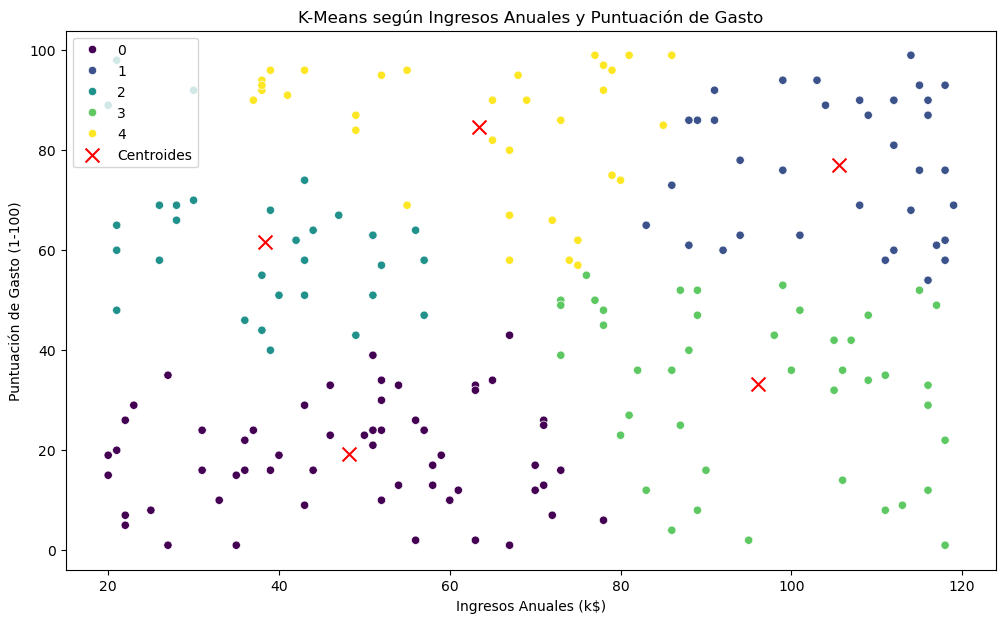

In [85]:
# Crear un gráfico de dispersión para los resultados de K-means
kmeans_centroids: np.ndarray = kmeans.cluster_centers_
kmeans_labels: np.ndarray = kmeans.labels_

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='Ingresos Anuales (k$)',
    y='Puntuación de Gasto (1-100)',
    hue=kmeans_labels,
    palette='viridis'
)
plt.scatter(
    kmeans_centroids[:, 0],
    kmeans_centroids[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroides'
)
plt.title('K-Means según Ingresos Anuales y Puntuación de Gasto')
plt.legend()
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.show()

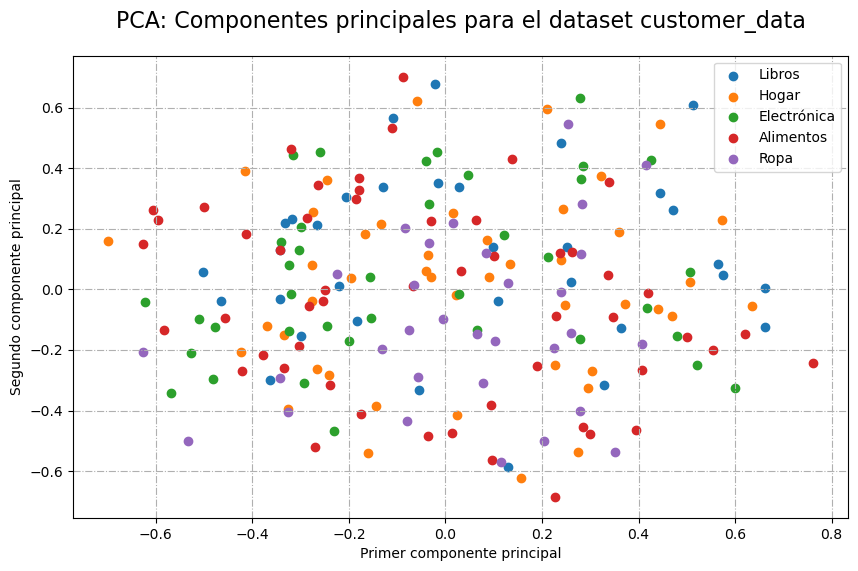

In [73]:
# Crear un gráfico de dispersión para los resultados de PCA
categories: list[str] = y.unique().tolist()

plt.figure(figsize=(10, 6))
for i in range(len(categories)):
    plt.scatter(x_pca[y_codes == i, 0], x_pca[y_codes == i, 1], label=categories[i])
plt.title(
    'PCA: Componentes principales para el dataset customer_data',
    fontsize=16,
    pad=20
)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.grid(True, linestyle='-.')
plt.legend()
plt.show()

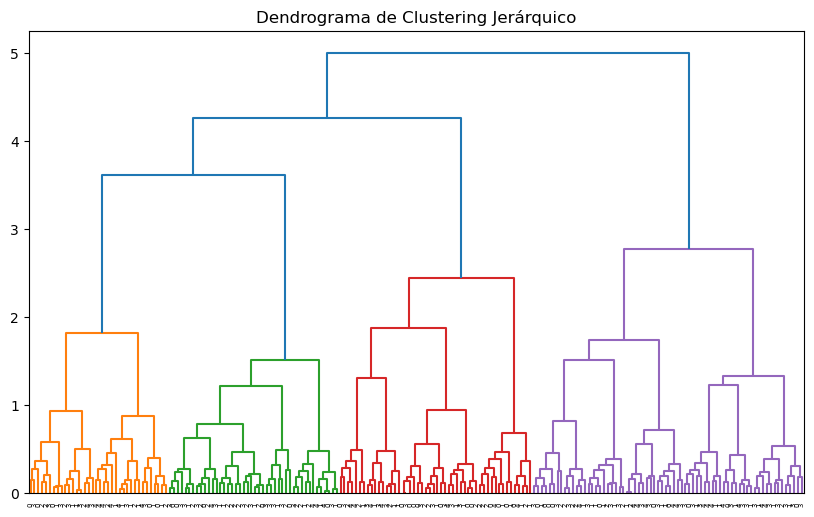

In [77]:
# Crear un dendrograma del clústering jerárquico
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    labels=y_codes.to_numpy(),
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

### 5. Interpretación y Estrategias de Marketing basadas en los Clusters

In [1]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media

In [ ]:
# Redacta una propuesta de estrategia de marketing para los diferentes clusters